

# Lead Scoring

<p align=center>
<img src="https://images.unsplash.com/photo-1596526131083-e8c633c948d2?ixlib=rb-4.0.3&ixid=MnwxMjA3fDB8MHxwaG90by1wYWdlfHx8fGVufDB8fHx8&auto=format&fit=crop&w=1074&q=80" width="60%"></p>

**Lead Scoring** is a method of ranking and prioritizing potential customers or leads based on their level of interest and engagement with a company's products or services. It involves assigning a numerical value or score to each lead based on their behavior and demographics, such as website visits, email opens, and job title.


> The purpose of lead scoring is to identify which leads are most likely to convert into customers and which ones require more nurturing. By focusing on the most promising leads, companies can maximize their sales efforts and improve their return on investment.


Lead scoring is particularly useful for sales and marketing teams that deal with a large volume of leads. It helps them prioritize their efforts and allocate their resources more effectively. For example, a sales representative can focus on the leads with the highest scores and spend less time on leads that are less likely to convert. This can result in a more efficient and effective sales process, leading to increased revenue and profitability.

One of the key benefits of lead scoring is that it allows companies to **personalize** their marketing and sales approach based on the lead's level of engagement. For instance, a lead that has demonstrated high interest in a particular product can be targeted with more specific and personalized marketing messages, increasing the chances of conversion.

Moreover, lead scoring can also help companies identify areas where their marketing and sales strategies may be falling short. By analyzing the behavior of leads that do not convert, companies can identify patterns and make adjustments to their approach to improve their conversion rates.

Lead scoring is a powerful tool for any company looking to optimize its sales and marketing efforts. By prioritizing the most promising leads and personalizing their approach, companies can increase their conversion rates, improve their return on investment, and gain a competitive advantage in their market.

## This Project

In this project, we're analyzing lead data for a company, in order to identify the clients that are most likely to be converted.

This way, we can direct our efforts into clients that would have a higher conversion rate when compared to the rest of the leads base.

With that in mind, let's get right into it.

In [1]:
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style()

# showing all columns
pd.set_option('display.max_columns', None)

# random seed
np.random.seed(42)

# importing the data
DATA_PATH = "C:/Users/Saurabh/OneDrive/Desktop/Resume/MA/Marketing Analytics Project/Leads.csv"
df = pd.read_csv(DATA_PATH)

# checking the first entries
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## Data Dictionary

In order to come up with a viable project, the first step is to take a hard look at the data, and understand how it was collected, what it means, and how the variables relate to one another.

Below, you'll find the data dictionary provided by the source of the data.

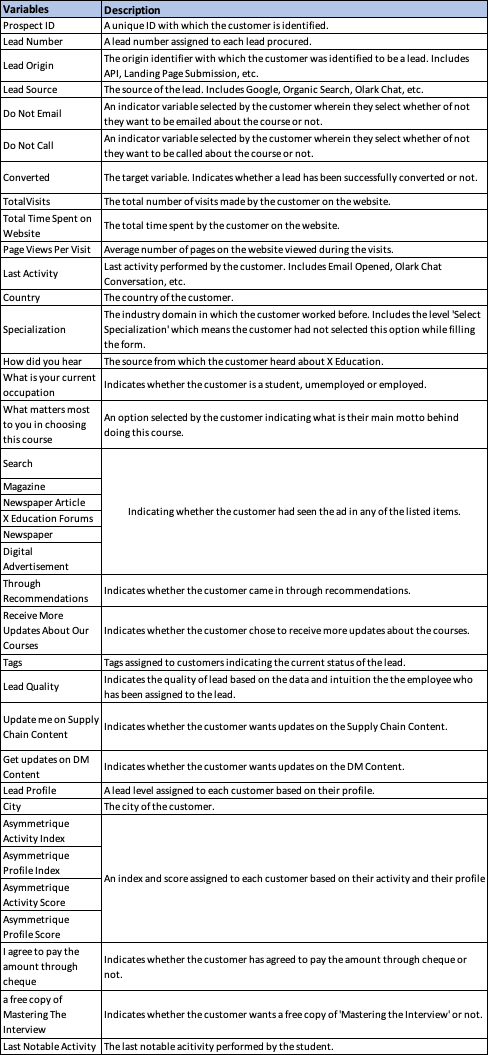

As you can see below, missing data can be quite a problem when it comes to this specific dataset.

Some of the missing data can be interpreted and imputed so as to lessen the impact they have on the overall analysis.

In this project, we'll be using `PyCaret`, which will help us deal with this and other data cleaning and pre-processing problems.

For now, let's keep analyzing the data.

In [2]:
# checking data integrity
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

## Data Analysis

The target variable is `Converted`.

We can see that there are lots of missing data in different variables. Each variable will require individual attention to make sure we can drop or replace the missing data in a way that won't hurt the analysis and the model.

The amount of variables available is also interesting. The dataset seems very detailed. However, maybe only a few of these variables are actually valuable. This will become clearer as we go through the project.



In [3]:
# statistical distribution of the dataset
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


### Conclusions

* Converted users tend to spend more time on the website, and view more pages.
* Median Asymmetrique Activity Score is quite high.
* Median Asymmetrique Profile Score also is quite high.

In [4]:
# statistical distribution of categorical variables
df.describe(include='O')

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
count,9240,9240,9204,9240,9240,9137,6779,7802,7033,6550,6531,9240,9240,9240,9240,9240,9240,9240,9240,5887,4473,9240,9240,6531,7820,5022,5022,9240,9240,9240
unique,9240,5,21,2,2,17,38,19,10,6,3,2,1,2,2,2,2,2,1,26,5,1,1,6,7,3,3,1,2,16
top,7927b2df-8bba-4d29-b9a2-b6e0beafe620,Landing Page Submission,Google,No,No,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,02.Medium,No,No,Modified
freq,1,4886,2868,8506,9238,3437,6492,1942,5043,5600,6528,9226,9240,9238,9239,9239,9236,9233,9240,2072,1560,9240,9240,4146,3222,3839,2788,9240,6352,3407


### Conclusions

* Most of the leads are from Mumbai, India.
* Most of the leads are unemployed, which is quite worrying given that we want them to purchase someething from us, and they don't have a reliable source of income at the moment.
* The most common Lead Source is Google.
* The most common Lead Origin is Landing Page Submission.
* Most of the leads have not entered their specialization and how they heard about the company.
* Most of the leads are looking for Better Career Prospects.

In [5]:
# creating a copy of the dataset
df_clean = df.copy()

# replacing 'Select' with NaN
df_clean.replace({'Select': np.nan}, inplace = True)

In [6]:
# checking for missing values
total = df_clean.isnull().sum().sort_values(ascending = False)
percent = (df_clean.isnull().sum()/df_clean.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


We can see that there are lots of missing values in some of the main variables.

Let's work on that.

In [7]:
# imputing most frequent level, 'Google
df_clean['Lead Source'] = df_clean['Lead Source'].replace(np.nan,'Google')

# replacing google with Google
df_clean['Lead Source'] = df_clean['Lead Source'].replace('google','Google')

# combining less frequent levels into one, 'Others'
x = df_clean['Lead Source'].value_counts(normalize = True).mul(100)
df_clean['Lead Source'] = df_clean['Lead Source'].replace(list(x[x < 1].index), 'Others')
lead_source = df_clean['Lead Source'].value_counts(dropna = False, normalize = True).mul(100).round(2)

In [8]:
# putting it into a dataframe
data = pd.DataFrame(lead_source)
data = data.reset_index()
data.head()

,Lead Source,proportion
0,Google,31.48
1,Direct Traffic,27.52
2,Olark Chat,18.99
3,Organic Search,12.49
4,Reference,5.78


In [16]:
# rename the columns using index as reference
data = data.set_axis(['Source', 'Count'], axis='columns')


In [17]:

#data = data.rename(columns={0: 'Source', 1: 'Count'}, inplace=)
data.head()


,Source,Count
0,Google,31.48
1,Direct Traffic,27.52
2,Olark Chat,18.99
3,Organic Search,12.49
4,Reference,5.78


In [18]:
# checking the name of the columns
data.columns

Index(['Source', 'Count'], dtype='object')

Now that we have organized the data regarding the source of the leads, let's visualize it so we can have a better understanding.

We can see that Google is the clear leader of the bunch, with most of the leads coming from them. This is a good indicator that the Google ads team is doing a good job.



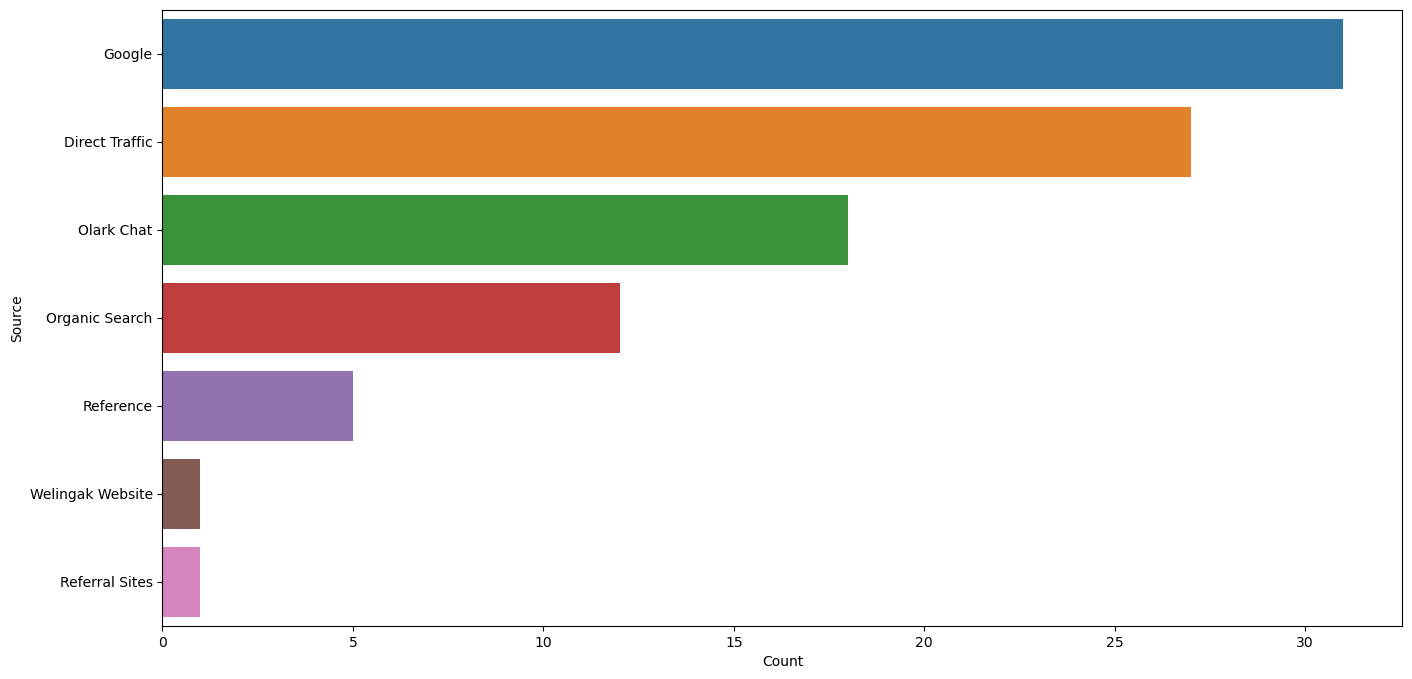

In [19]:
# preparing the data
cat_var = []
for i in range(len(data)):
    cat_var += [data.iloc[i]['Source']] * int(data.iloc[i]['Count'])

# create a count plot using Seaborn
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(y=cat_var)

# add x-label and y-label to the plot|
plt.xlabel('Count')
plt.ylabel('Source')

# show the plot
plt.show()

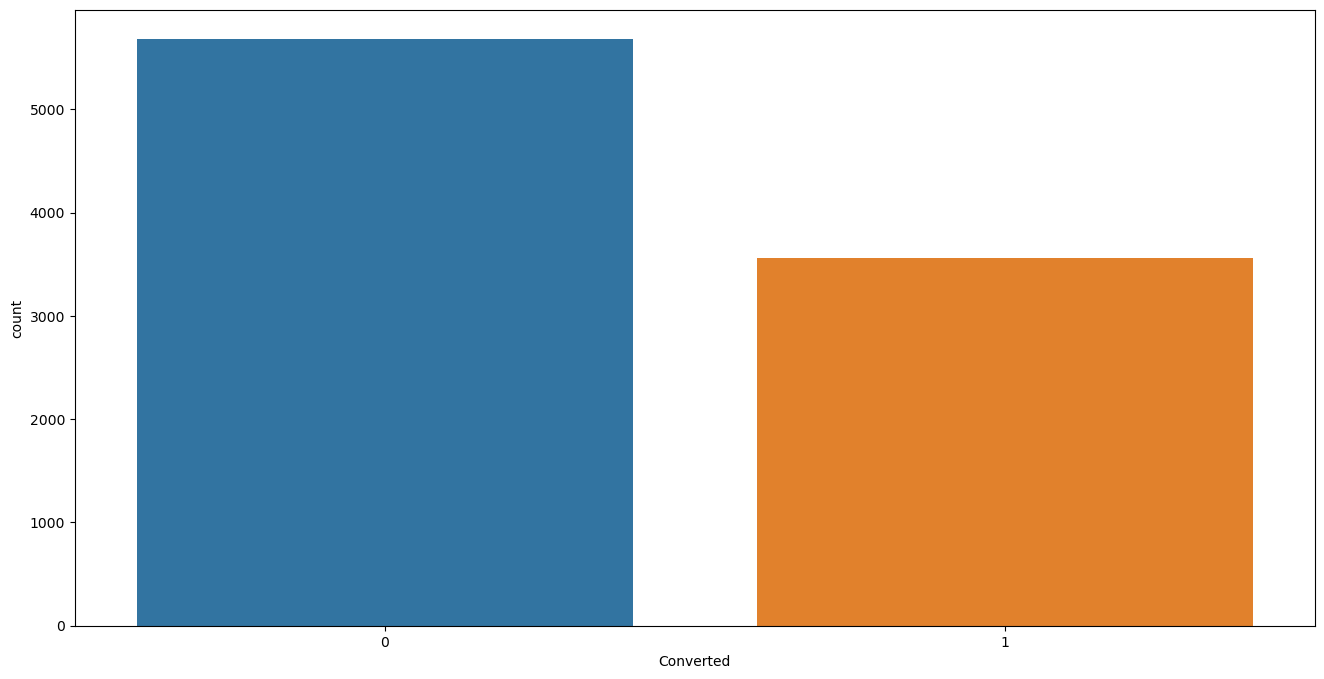

In [20]:
# investigating the balance of the target variable
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x='Converted', data=df);

As expected, we have more leads that have not converted than leads that have.

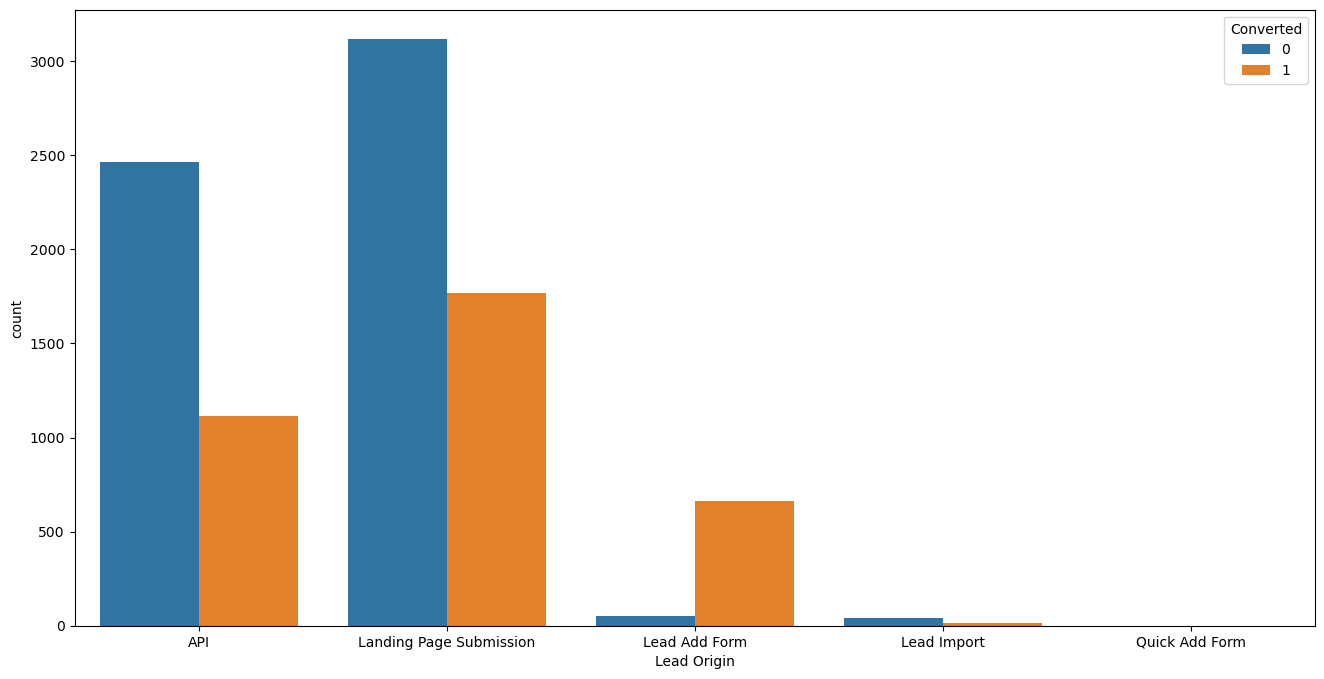

In [21]:
# visualization of the regions
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x='Lead Origin', data=df_clean, hue='Converted')
# plt.xticks(rotation=90)
plt.show();



Confirming our previous analysis, the Landing Page is doing a great job, getting and converting a great amount of leads.

The Lead Add Form, as a manual and intern process, shows a weird distribution, with more converted leads than non-converted leads. This can be explained by the origin of this data.

No relevant data is shown from Quick Add Form.

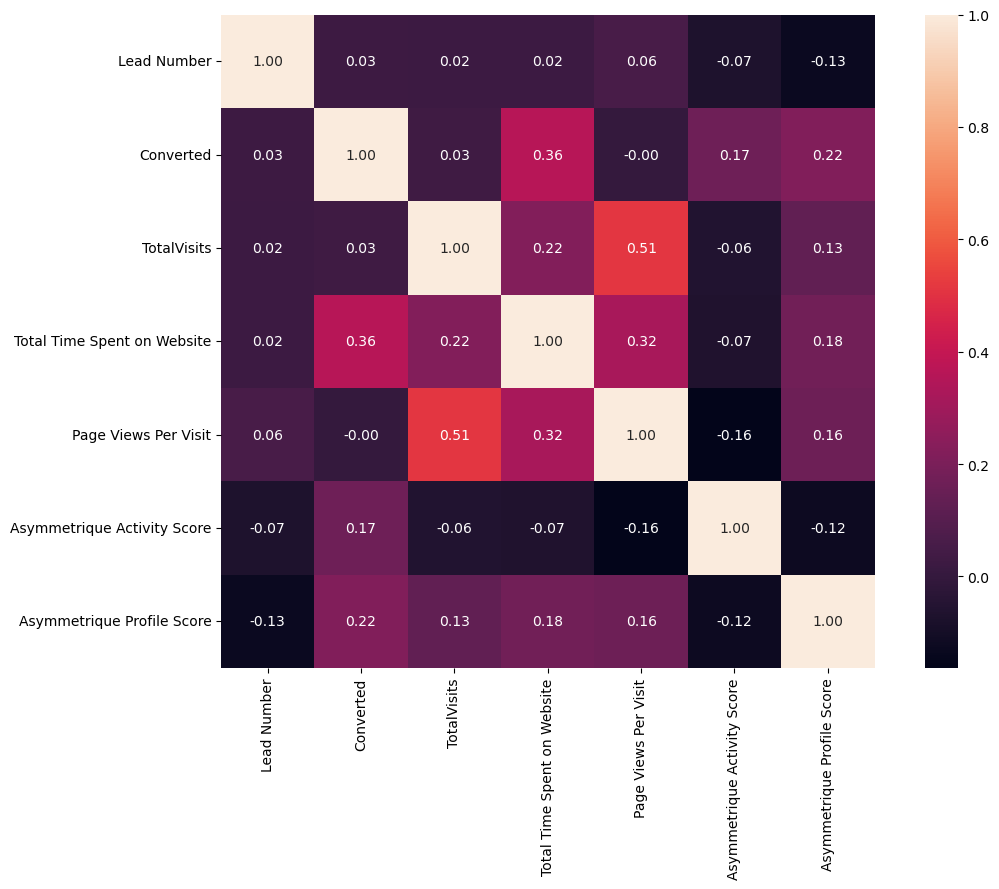

In [25]:
# Drop non-numeric columns
numeric_df_clean = df_clean.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr = numeric_df_clean.corr()

# Plotting the heatmap
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corr, fmt='.2f', square=True, linecolor='white', vmax=1.0, annot=True, annot_kws={'size': 10})
plt.tight_layout()


Taking a look at the Correlation Matrix, we can see that Total Time Spent on Website is the most correlated variable with the target variable, Converted.

However, it is still less than we would like to see to consider it a strong correlation.

Also, as expected, TotalVisits is strongly correlated with Page Views Per Visit, which makes a lot of sense.

## PyCaret

When it comes to Machine Learning, and making predictions, for this project, I will be using [PyCaret](https://pycaret.org).

<p align="center"><img src="https://pycaret.org/wp-content/uploads/2020/03/Divi93_43.png" width="60%"></p>

PyCaret is an open-source, low-code machine learning library in Python that automates machine learning workflows.

This means we can do a lot a more, with a less effort, in less time. This means more tests, and more time available for thinking about and solving our problem, and less time coding solutions and manually optimizing models.

PyCaret is also great at dealing with data. It splits the data correctly, deals with missing values, categorical variables, and much more.

It's a great tool in any Data Scientist's belt.

As I said before, PyCaret takes good care of the data and the splits. However, I'll be manually splitting the data before we move forward, so we can have a simple example of how the model would be used outside of this environment.

In [23]:
# splitting the data
test = df.sample(frac=0.10)
train = df.drop(test.index)

test.reset_index(inplace=True, drop=True)
train.reset_index(inplace=True, drop=True)

In [27]:
# installing PyCaret
!pip install --upgrade pip


  Obtaining dependency information for pip from https://files.pythonhosted.org/packages/8a/6a/19e9fe04fca059ccf770861c7d5721ab4c2aebc539889e97c7977528a53b/pip-24.0-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/2.1 MB ? eta -:--:--
    --------------------------------------- 0.0/2.1 MB 330.3 kB/s eta 0:00:07
   - -------------------------------------- 0.1/2.1 MB 544.7 kB/s eta 0:00:04
   -- ------------------------------------- 0.1/2.1 MB 1.1 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 1.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.2/2.1 MB 1.5 MB/s eta 0:00:02
   ------ --------------------------------- 0.4/2.1 MB 1.3 MB/s eta 0:00:02
   -------- ------------------------------- 0.4/2.1 MB 1.4 MB/s eta 0:00:02
   ---------- ----------------------------- 0.6/2.1 MB 1.6 MB/s eta 0:00:01
   ------------- -------------------------- 0.7/2.1 MB 1.9 M

ERROR: To modify pip, please run the following command:
C:\Users\Saurabh\anaconda3\python.exe -m pip install --upgrade pip


In [28]:
!pip install pycaret

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


  Obtaining dependency information for pycaret from https://files.pythonhosted.org/packages/c7/d8/4e703f17f17d7d7764fe6d586872e787ce3a248640221f5f2d586f671eee/pycaret-3.3.0-py3-none-any.whl.metadata
  Using cached pycaret-3.3.0-py3-none-any.whl.metadata (17 kB)
  Obtaining dependency information for scikit-learn>1.4.0 from https://files.pythonhosted.org/packages/79/3d/02d5d3ed359498fec3abdf65407d3c07e3b8765af17464969055aaec5171/scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata
  Using cached scikit_learn-1.4.2-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached pyod-1.1.3-py3-none-any.whl
  Obtaining dependency information for imbalanced-learn>=0.12.0 from https://files.pythonhosted.org/packages/6e/1b/66764ecf370e797759be06fb38c11640ea1f9456ae10f8640a33cfa726ea/imbalanced_learn-0.12.2-py3-none-any.whl.metadata
  Using cached imbalanced_learn-0.12.2-py3-none-any.whl.metadata (8.2 kB)
  Obtaining dependency information for category-encoders>=2.4.0 from https://files.pythonhoste

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


Ok, so now we're ready to set up the model, and move forward with this project.

As you can see below, it understands the data quite well, splits the data correctly, and also takes care of missing data, preprocessing, imputation, categorical variables, and everything else we would have to manually take care of without this library.

In [17]:
# init setup
from pycaret.classification import *
setup = setup(train, target = 'Converted', ignore_features = ['Prospect ID', 'Lead Number'])

,Description,Value
0,Session id,5498
1,Target,Converted
2,Target type,Binary
3,Original data shape,"(8316, 37)"
4,Transformed data shape,"(8316, 135)"
5,Transformed train set shape,"(5821, 135)"
6,Transformed test set shape,"(2495, 135)"
7,Ignore features,2
8,Ordinal features,9
9,Numeric features,5


With the data ready, it's time to train and compare different Machine Learning models, to find which one works best for our data.

I'll be optimizing for `AUC`, in order to find a good and balanced otpimization for the model.

In a real-life project, the strategy team could set a different metric to optmize by.

In [18]:
# compare all models
best_model = compare_models(sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.9218,0.9711,0.8798,0.9139,0.8963,0.8336,0.8342,5.7100
lda,Linear Discriminant Analysis,0.9187,0.9695,0.8677,0.9165,0.8913,0.8265,0.8275,1.2090
et,Extra Trees Classifier,0.9117,0.9669,0.8337,0.9295,0.8787,0.8096,0.8129,2.3210
rf,Random Forest Classifier,0.6958,0.9435,0.2203,0.9447,0.3522,0.2474,0.3588,2.0780
ada,Ada Boost Classifier,0.6385,0.8865,0.0808,0.7423,0.1437,0.0806,0.1564,2.0620
nb,Naive Bayes,0.8162,0.8680,0.6661,0.8225,0.7354,0.5971,0.6054,0.7740
xgboost,Extreme Gradient Boosting,0.6155,0.8485,0.0170,0.4806,0.0327,0.0074,0.0244,4.5980
knn,K Neighbors Classifier,0.7791,0.8257,0.6737,0.7315,0.7011,0.5264,0.5278,1.4530
qda,Quadratic Discriminant Analysis,0.7416,0.8186,0.6428,0.7423,0.6423,0.4502,0.4894,0.9200
gbc,Gradient Boosting Classifier,0.6150,0.8166,0.0165,0.5006,0.0317,0.0062,0.0228,2.2710


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

After testing with different models, optimizing for `AUC`, we found that `Logistic Regression` yielded the best results.

With that in mind, it's time to tune the model, to make sure it's working at its best when the time for real-world new data comes in.

In [19]:
# tuning parameters
tuned_model = tune_model(best_model, optimize='AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9228,0.9703,0.9018,0.8978,0.8998,0.8370,0.8370
1,0.9313,0.9825,0.8879,0.9296,0.9083,0.8534,0.8539
2,0.9072,0.9669,0.8655,0.8894,0.8773,0.8027,0.8029
3,0.9364,0.9840,0.8879,0.9429,0.9145,0.8640,0.8650
4,0.8986,0.9562,0.8616,0.8733,0.8674,0.7854,0.7854
5,0.9416,0.9756,0.9286,0.9204,0.9244,0.8768,0.8768
6,0.9158,0.9617,0.8661,0.9108,0.8879,0.8205,0.8212
7,0.8883,0.9574,0.8259,0.8768,0.8506,0.7615,0.7624
8,0.9399,0.9813,0.8929,0.9479,0.9195,0.8716,0.8726


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


Great!

Now it's time to check our model performance with a Confusion Matrix.

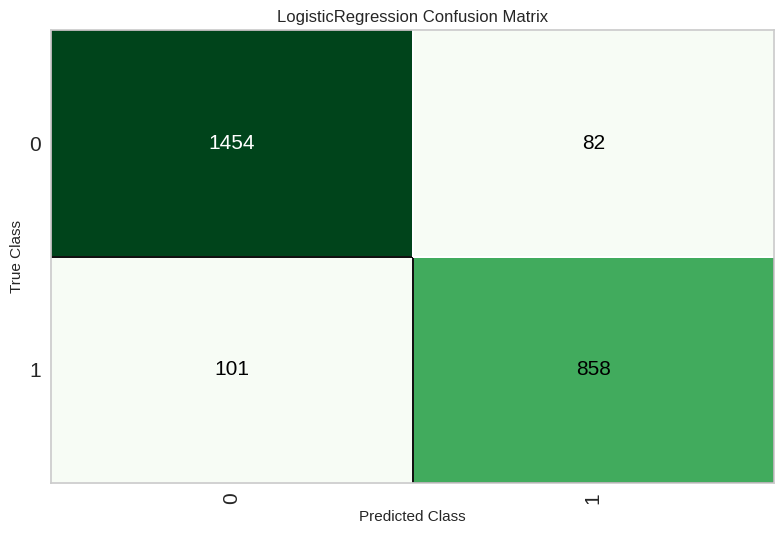

In [20]:
# Confusion Matrix
plot_model(tuned_model, plot = 'confusion_matrix')

### Conclusions

If you sum up all the four quadrants, it will equal the number of customer leads in the test set (1454 + 82 + 101 + 858 = 2495).

* 858 customers (bottom right quadrant) are True Positives. This means that the model predicted they would convert, and they did.

* 82 leads are False Positive. For this quadrant, we have spent time and effort 
on these clients, and yet they didn't convert.

* 101 leads are False Negatives, which means Missed Opportunites. Clients we could have converted, but didn't.

* 1454 leads are True Negatives. These have yielded no impact to the business. We predicted they wouldn't convert, and they didn't.

### Feature Importance

**Feature Importante** can be an incredibly useful analysis. It indicates the most important variables for the model's predictions.

In simpler terms, these are the most important variables when it comes to lead conversion.

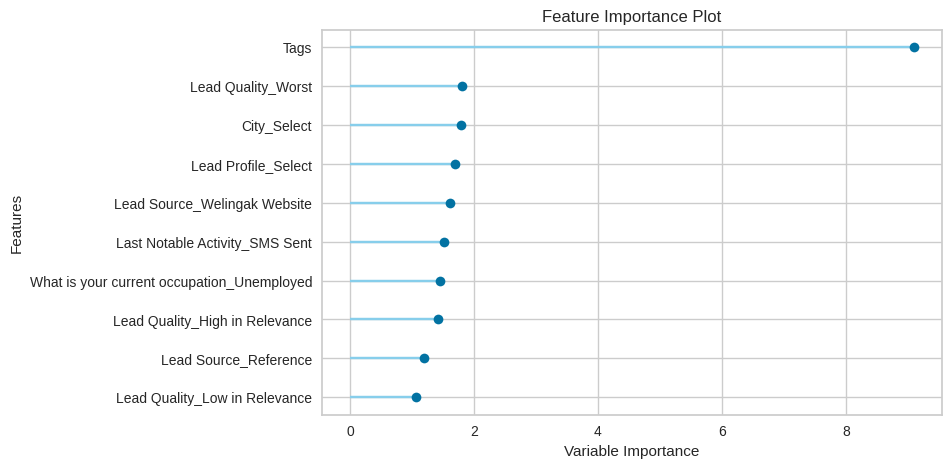

In [21]:
# Feature Importance
plot_model(tuned_model, plot = 'feature')

### Predicting On New Data

Everything we've done before is interesting and insightful. However, if the model can't be used in real-life, in real-time, with real world data, it's nothing more than a fun experiment.

With that in mind, it's time to see how it deals with data it has never seen before.

On top of that, we have two variables to analyze, when it comes to dealing with these clients:

* `prediction_label` indicates what the model has calculated as the future of the lead. 1 means conversion, and 0 means no conversion.

* `prediction_score_0` and `prediction_score_1` indicate the probability of a given lead to convert or not. With this information, we can further segment these leads, and create specific campaigns, or actions the sales team can take in order to optimize conversion.

In [22]:

# generate labels using predict_model
predict_model(tuned_model, data=test, raw_score=True)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Logistic Regression,0.9242,0.9750,0.9123,0.8976,0.9049,0.8419,0.8420


,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity,Converted,prediction_label,prediction_score_0,prediction_score_1
0,8b94b8c4-7107-4c12-8a66-531d0ed974c4,615582,Landing Page Submission,Google,No,No,8.0,252,2.67,Email Opened,...,NaN,NaN,NaN,No,Yes,Email Opened,1,1,0.0614,0.9386
1,a4c0a4e4-c5d8-4e48-8a4f-030611dde534,588939,Landing Page Submission,Direct Traffic,Yes,No,2.0,929,2.00,Email Bounced,...,02.Medium,14.0,16.0,No,Yes,Modified,0,0,0.9533,0.0467
2,889c23c8-84d0-4936-97ad-7b438dc2e2d7,621242,Landing Page Submission,Direct Traffic,Yes,No,1.0,2,1.00,Email Bounced,...,NaN,NaN,NaN,No,No,Modified,0,0,0.9863,0.0137
3,85dfdbea-fb6c-4428-a59c-59155bedea4a,589803,Landing Page Submission,Direct Traffic,No,No,2.0,323,2.00,Email Opened,...,01.High,14.0,18.0,No,No,Email Opened,0,0,0.9959,0.0041
4,cbc292d8-752f-47ea-92c6-07d4247638d5,651441,Landing Page Submission,Google,No,No,3.0,201,3.00,Email Opened,...,01.High,13.0,18.0,No,No,Email Opened,0,0,0.9312,0.0688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
919,a75dac45-a96a-4985-bb2c-3a819dd6bea2,637070,Lead Add Form,Welingak Website,No,No,0.0,0,0.00,SMS Sent,...,02.Medium,15.0,15.0,No,No,Modified,1,1,0.0005,0.9995
920,b3625b6d-4df0-47cc-af33-ec9e06ad50e9,605442,API,Organic Search,Yes,No,10.0,371,3.33,Page Visited on Website,...,NaN,NaN,NaN,No,No,Page Visited on Website,0,0,0.9718,0.0282
921,31d21bcb-7329-4177-8359-7333b1c2ac42,586167,API,Olark Chat,No,No,0.0,0,0.00,Olark Chat Conversation,...,02.Medium,17.0,15.0,No,No,Modified,0,0,0.9410,0.0590
922,50ad2a94-bbd8-4a4a-8aed-f91b87336bdb,600560,Landing Page Submission,Organic Search,Yes,No,3.0,244,3.00,Email Bounced,...,NaN,NaN,NaN,No,Yes,Modified,0,0,0.9999,0.0001


## Conclusions

The results were satisfactory, considering `AUC` was the main metric for optimization. PyCaret helps speed up the process, and find answers to complex questions in a timely manner.

On top of that, we have a deeper understanding of the data, the process, and can act on these insights in order to increase conversion.

* **About PyCaret**

All of this could have been done by hand, manually tuning the model and finding the best combinations. However, with libraries like this we can spend more time working on the actual problem, rather than coding.

Of course, we could have done differently, and we can still work out some more performance out of this data.

This kind of project can have a real impact in the business, and has helped me improve the performance of our sales and email marketing team, boosting sales and, consequently, revenue for the company.

Should you have any questions, I'd be happy to talk about the project.

Contact me on - https://saurabhhusky.github.io/portfolio/